In [65]:
import pandas as pd

url = 'https://github.com/louispaulet/hatvp_viz/raw/main/datasets/stocks/hatvp_stocks.csv'
df = pd.read_csv(url, index_col=0)

# Now you can work with the DataFrame 'df' as needed


In [66]:
def get_length(df):
  return len(df.index)

base_length = get_length(df)

def check_length(df):
  if get_length(df) < base_length:
    print(f"the dataframe is too short! Found {get_length(df)} elements instead of expected {base_length}")
  else:
    print('OK!')

In [67]:
check_length(df)

OK!


In [68]:
df.sort_values('evaluation', ascending=False)

,declarations_declaration_uuid,declarations_declaration_dateDepot,declarant_nom,declarant_prenom,declarant_dateNaissance,qualiteDeclarantForPDF,motif_id,commentaire,nomSociete,evaluation,remuneration,nombreParts,actiConseil,capitalDetenu,nomOrganisationConseil,motif_label
143,c2c9d9a9-f982-471c-a314-b2b40f583a93,15/09/2020 21:53:39,briand,philippe,26/10/1960,Membre d’EPCI/METROPOLE TOURS/VICE PRESIDENT,CREATION,NaN,SAS ARCHE,300000000.0,SALAIRE 98.253 € NET EN QUALITE DE PRESIDENT D...,34096445.0,NaN,100.0,NaN,NaN
212,01e889f4-7c43-4f0a-a8bc-863cf13205cf,22/10/2021 10:57:55,briand,philippe,26/10/1960,Membre d’EPCI/METROPOLE TOURS/VICE-PRESIDENT,CREATION,NaN,SAS ARCHE,300000000.0,SALAIRE 98.253 € NET EN QUALITE DE PRESIDENT D...,34096445.0,NaN,100.0,NaN,NaN
193,09f428e4-b277-4d9f-a681-304e221a804b,17/08/2022 17:45:35,HABERT-DASSAULT,Victor,12/07/1992,Député/Oise(60),CREATION,[Données non publiées],GROUPE INDUSTRIEL MARCEL DASSAULT,187698139.0,5098898,327272.0,Non,1.0,NaN,NaN
196,09f428e4-b277-4d9f-a681-304e221a804b,17/08/2022 17:45:35,HABERT-DASSAULT,Victor,12/07/1992,Député/Oise(60),CREATION,[Données non publiées],HDH,170639217.0,14318581,44820961.0,Non,20.0,NaN,NaN
194,09f428e4-b277-4d9f-a681-304e221a804b,17/08/2022 17:45:35,HABERT-DASSAULT,Victor,12/07/1992,Député/Oise(60),CREATION,[Données non publiées],ROND POINT IMMOBILIER,159950589.0,0,1257700.0,Non,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23e7dc38-a21f-4270-b956-d4f70232c299,17/11/2021 16:00:33,ZOURGUI,NADIA,09/06/1969,Maire ou adjoint municipal/Strasbourg (67)/adj...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,a59cb0f9-4a44-438a-9929-0a4b41bc85ed,15/02/2022 11:07:33,ZOURGUI,NADIA,09/06/1969,Maire ou adjoint municipal/Strasbourg (67)/Adj...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,32f13c10-d64e-4697-9dca-f7a6950fdb59,17/06/2021 22:39:18,Zoutu,Comlan Hubert,03/10/1942,Membre d’EPCI/Communauté d'Agglomération Seine...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,5e7c9ce7-dc5c-4777-ae9f-39d40f3e02f4,03/12/2020 23:48:29,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## conversion section

Here we clean `clean_df` so it works in all further sections

In [69]:
clean_df = df.copy()

# evaluation
clean_df['evaluation'] = clean_df['evaluation'].fillna(0)  # Fill NA values in "evaluation" column with 0 as NA stock is evaluated at 0
clean_df['evaluation'] = clean_df['evaluation'].astype(int)  # Convert to int
clean_df['nombreParts'] = clean_df['nombreParts'].fillna(0)  # Fill NA values in "nombreParts" column with 0 as NA nombreParts is evaluated at 0
clean_df['nombreParts'] = clean_df['nombreParts'].astype(int)  # Convert to int
clean_df['remuneration'] = clean_df['remuneration'].fillna(0)  # same for this one, although it does also contain text

clean_df['actiConseil'] = clean_df['actiConseil'].apply(lambda value: value if value == 'Oui' else 'Non')

clean_df['declarations_declaration_dateDepot'] = pd.to_datetime(clean_df['declarations_declaration_dateDepot'], format='%d/%m/%Y %H:%M:%S')

clean_df

,declarations_declaration_uuid,declarations_declaration_dateDepot,declarant_nom,declarant_prenom,declarant_dateNaissance,qualiteDeclarantForPDF,motif_id,commentaire,nomSociete,evaluation,remuneration,nombreParts,actiConseil,capitalDetenu,nomOrganisationConseil,motif_label
0,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],ORANGE,877,néant,83,Non,NaN,NaN,NaN
1,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],CREDIT AGRICOLE SA,2910,néant,341,Non,NaN,NaN,NaN
2,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],AIRBUS,1929,NEANT,20,Non,NaN,NaN,NaN
3,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],L'OREAL,6552,NEANT,20,Non,NaN,NaN,NaN
4,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],ORANGE,877,néant,83,Non,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,BNP PARIBAS,10820,0,200,Non,NaN,NaN,NaN
103,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRE CDN,RENAULT,7073,0,200,Non,NaN,NaN,NaN
104,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,SAINT GOBAIN,11238,0,200,Non,NaN,NaN,NaN
105,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,UNIBAIL RODAMCO,7991,0,100,Non,NaN,NaN,NaN


In [70]:
check_length(clean_df)

OK!


In [71]:
clean_df['nomSociete'].value_counts().to_frame()

,nomSociete
SCI \n [Données non publiées],1366
SCI\n [Données non publiées],250
[Données non publiées],222
sci \n [Données non publiées],93
ENGIE,80
...,...
Accenture CL.A,1
INTUITIVE SURGICAL,1
DANAHER,1
APPLE,1


In [72]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from unidecode import unidecode


nom_soc_df = clean_df.copy()

# fill and remove many samples
nom_soc_df['nomSociete'] = nom_soc_df['nomSociete'].fillna('Données non publiées')
nom_soc_df.loc[nom_soc_df['nomSociete'].str.contains('Donnée'), 'nomSociete'] = 'Données non publiées'

# normalize company names by removing accents...
nom_soc_df['nomSociete'] = nom_soc_df['nomSociete'].apply(unidecode)
# ...and setting everything to uppercase
nom_soc_df['nomSociete'] = nom_soc_df['nomSociete'].str.upper()

# useless for now
# nom_soc_df['declaration_year'] = nom_soc_df['declarations_declaration_dateDepot'].dt.year


nom_soc_df['nomSociete'].value_counts()

DONNEES NON PUBLIEES         11094
CREDIT AGRICOLE                134
ENGIE                          111
AIR LIQUIDE                    109
ORANGE                         104
                             ...  
BOIRON                           1
SARL MASSETIMMO                  1
ASSOCIATED BRITISH FOOD          1
ASSA ABLOY 581                   1
ELECTRICITE DE STRASBOURG        1
Name: nomSociete, Length: 2019, dtype: int64

In [74]:
nom_soc_df

,declarations_declaration_uuid,declarations_declaration_dateDepot,declarant_nom,declarant_prenom,declarant_dateNaissance,qualiteDeclarantForPDF,motif_id,commentaire,nomSociete,evaluation,remuneration,nombreParts,actiConseil,capitalDetenu,nomOrganisationConseil,motif_label
0,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],ORANGE,877,néant,83,Non,NaN,NaN,NaN
1,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],CREDIT AGRICOLE SA,2910,néant,341,Non,NaN,NaN,NaN
2,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],AIRBUS,1929,NEANT,20,Non,NaN,NaN,NaN
3,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],L'OREAL,6552,NEANT,20,Non,NaN,NaN,NaN
4,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,Député/Ain(01),CREATION,[Données non publiées],ORANGE,877,néant,83,Non,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,BNP PARIBAS,10820,0,200,Non,NaN,NaN,NaN
103,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRE CDN,RENAULT,7073,0,200,Non,NaN,NaN,NaN
104,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,SAINT GOBAIN,11238,0,200,Non,NaN,NaN,NaN
105,19140875-1488-43e7-95a7-63d0b7212a19,2021-06-25 13:29:08,zuili,nicolas,08/03/1965,Maire ou adjoint municipal/Rouen (76),CREATION,COMPTE TITRES CDN,UNIBAIL RODAMCO,7991,0,100,Non,NaN,NaN,NaN


In [75]:
check_length(nom_soc_df)

OK!


In [96]:
nom_soc_df.declarant_nom.value_counts()

briand               138
BLANC                120
Renaud Garabedian     92
Cathelain             92
juvin                 89
                    ... 
Dehaese                1
DE GIRARDI             1
MELE                   1
MELIN                  1
Zulesi                 1
Name: declarant_nom, Length: 5071, dtype: int64

In [ ]:
nom_soc_df

In [95]:
len(nom_soc_df['declarations_declaration_dateDepot'].unique())

10051

## exportation of cleaned stocks dataset

In [98]:
nom_soc_df.to_csv('/content/drive/MyDrive/AI/HATVP/datasets/stocks/hatvp_cleaned_stocks.csv')

# Charts!

Keep in mind that multiple declarations for each person are still in the database => the same stocks are duplicated for each submission so take the graphs with a grain of salt.

In [78]:
check_length(nom_soc_df)

OK!


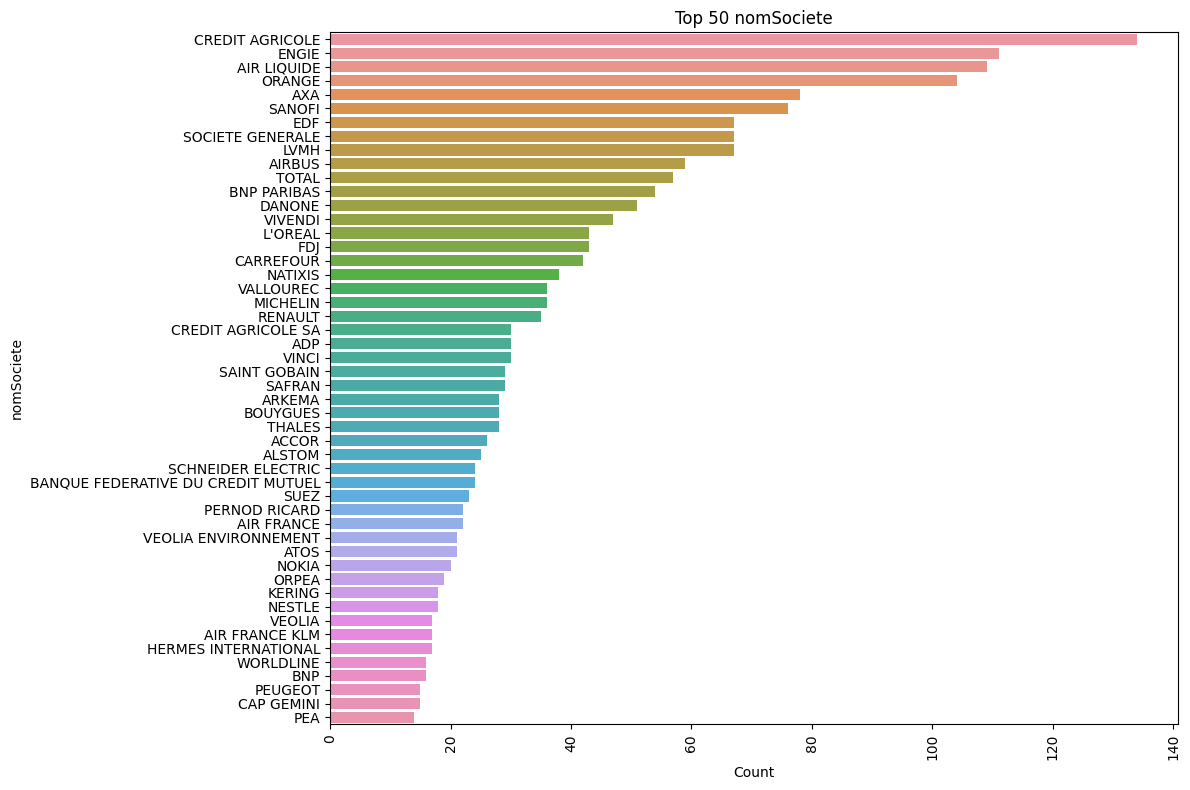

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt


temp_top_50_df = nom_soc_df[~nom_soc_df.nomSociete.str.contains('DONNEES NON PUBLIEES')]

# Sort the DataFrame by counts in descending order and select the top 50
top_50_societes = temp_top_50_df['nomSociete'].value_counts().head(50)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y=top_50_societes.index, x=top_50_societes.values)
plt.xticks(rotation=90)
plt.ylabel('nomSociete')
plt.xlabel('Count')
plt.title('Top 50 nomSociete')
plt.tight_layout()
plt.show()


<ipython-input-89-6fafc129f5a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_30['full_name'] = top_30['declarant_prenom'] + ' ' + top_30['declarant_nom']


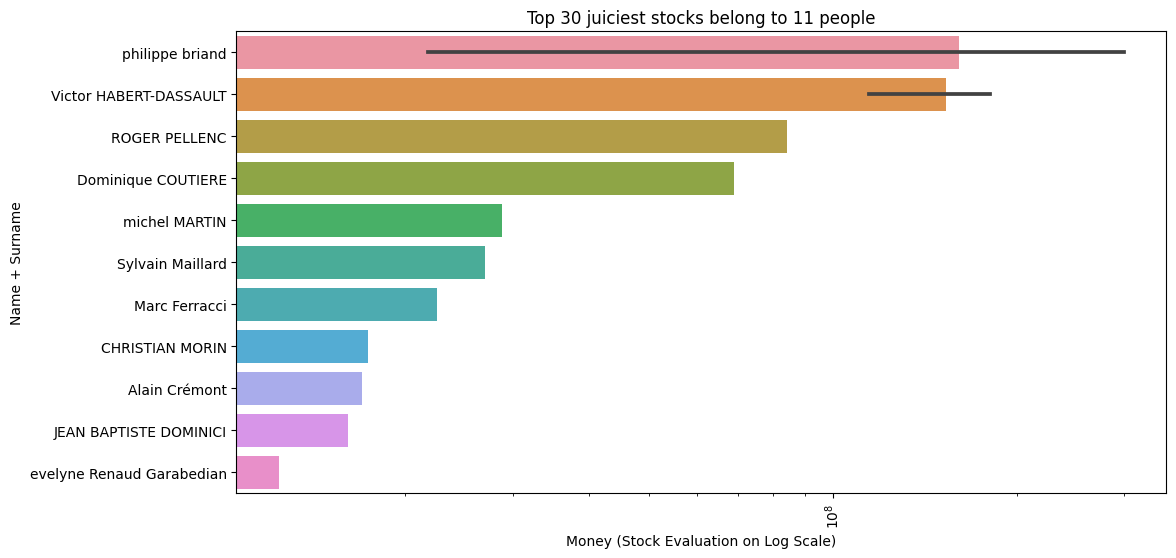

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clean_df is already defined and contains the cleaned data

# Sort the dataframe by 'evaluation' column in descending order
sorted_df = clean_df.sort_values('evaluation', ascending=False)

# Select the top 30 earners
top_30 = sorted_df.head(30)

# Concatenate the 'declarant_prenom' and 'declarant_nom' columns to create the full name
top_30['full_name'] = top_30['declarant_prenom'] + ' ' + top_30['declarant_nom']

# Create the barplot using seaborn with log scale for the money axis
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(y='full_name', x='evaluation', data=top_30)

# Set log scale for the y-axis
plt.xscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.ylabel('Name + Surname')
plt.xlabel('Money (Stock Evaluation on Log Scale)')
plt.title('Top 30 juiciest stocks belong to 11 people')

# Show the plot
plt.show()
